# Machine learning 101

### Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mydata.csv")

In [3]:
df.head()

,X,Y
0,40.5128,63.5096
1,55.3846,67.3558
2,76.1538,33.1250
3,-5.1282,85.8173
4,17.6923,79.6635


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       37 non-null     float64
 1   Y       37 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


### Linear regression
#### Predict x => ax + b

In [6]:
# let's find a 
mu_y = np.mean(df.Y)
mu_x = np.mean(df.X)
x = df.X
y = df.Y

In [7]:
a = np.sum((y - mu_y)*(x - mu_x)) / np.sum((x - mu_x)**2)
a

-0.4720222370793708

In [8]:
b = mu_y - a*mu_x
b

75.98570833216662

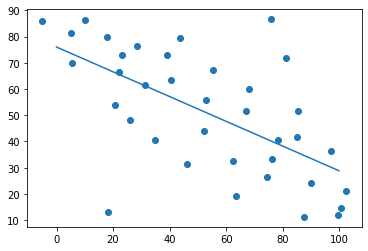

In [9]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
test = lambda x: a*x+b
plt.plot(x_test, test(x_test))
plt.show()

y = -0.4720222370793709*x+78.09979481865312


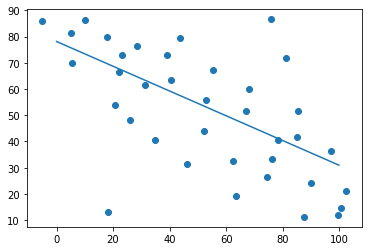

In [10]:
x,y = df.X,df.Y
mu_y = np.mean(x)
mu_x = np.mean(x)
x = np.array(x)
y = np.array(y)
a = np.sum((y - mu_y)*(x - mu_x)) / np.sum((x - mu_x)**2)
b = mu_y - a*mu_x
print(f"y = {a}*x+{b}")
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
test = lambda x: a*x+b
plt.plot(x_test, test(x_test))
plt.show()

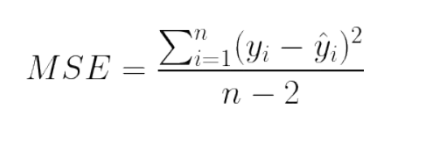
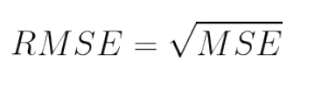

In [21]:
## Erreur quadratiques
n = len(df) # nombre de point de données
MSE = np.sum((y-test(df.X))**2)/(n) # -2 degree de liberté ( a et b sont 2 degrée de liberté)
RMSE = np.sqrt(MSE)

print(f'MSE = {MSE:.3f}')
print(f'RMSE = {RMSE:.3f}')

MSE = 342.856
RMSE = 18.516


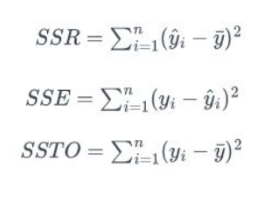
ŷ : the predicted value of y 

In [74]:
#MAE = np.mean(np.abs(y))
SSR = np.sum((test(x)-mu_y)**2)
SSE = np.sum((y-test(x))**2)
SSTO = np.sum((y-mu_y)**2)
print(f"SSR={SSR:.3}")
print(f"SSE={SSE:.3}")
print(f"SSTO={SSR:.3}")

SSR=7.76e+03
SSE=1.27e+04
SSTO=7.76e+03


In [15]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y,test(x),squared=True)

342.8562534997463